<a href="https://colab.research.google.com/github/NguyenDacCuong2604/ML/blob/main/Lab_4_20130215_NguyenDacCuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [ ]:
# code
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [ ]:
# code
#Load the iris dataset
iris = load_iris()
#Split the dataset 70%-30%
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)
#Regression model
model = LogisticRegression(random_state=1)
#Train the model
model.fit(X_train, y_train)
#Testing set
y_pred = model.predict(X_test)
#Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
#Matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)
#Do chinh xac cua mo hinh
print("Accuracy:", accuracy)

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy: 0.9777777777777777


#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# code
#load data
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
#Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split 7-3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
#create Regression model
model = LogisticRegression(random_state=1)
#train model
model.fit(X_train, y_train)
#test
y_pred = model.predict(X_test)
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#Matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)


Accuracy: 0.9703703703703703
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  2  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 50  0  1  0  0  2  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  2]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  0  0  0  0  0  2 57]]


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [44]:
#import
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

     k  accuracy  precision    recall        f1
0    1  0.975926   0.975913  0.975411  0.975602
1    3  0.972222   0.973356  0.970994  0.971773
2    5  0.970370   0.970749  0.969487  0.969838
3    7  0.974074   0.973259  0.973894  0.973423
4    9  0.970370   0.969445  0.969679  0.969268
5   11  0.962963   0.961794  0.963045  0.962026
6   13  0.964815   0.962891  0.965020  0.963648
7   15  0.959259   0.956620  0.958478  0.957143
8   17  0.951852   0.949825  0.951652  0.949988
9   19  0.951852   0.950726  0.951957  0.950308
10  21  0.950000   0.948280  0.949744  0.947920
11  23  0.953704   0.951762  0.952852  0.951548
12  25  0.948148   0.945893  0.946939  0.945449
13  27  0.944444   0.942643  0.942857  0.941443
14  29  0.937037   0.936097  0.935518  0.933989
Best k: 1


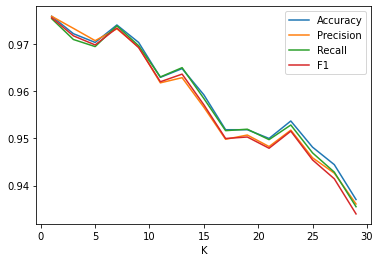

In [49]:
# code
#load dataset
iris = load_iris()
X = mnist.data
y = mnist.target
#Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#split 7-3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
metrics_dict = {'k':[], 'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
#k values
for k in range(1, 30, 2):
    # Create a kNN
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the kNN 
    knn.fit(X_train, y_train)
    # Test
    y_pred = knn.predict(X_test)  
    #metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro') 
    # Store the performance metrics
    metrics_dict['k'].append(k)
    metrics_dict['accuracy'].append(accuracy)
    metrics_dict['precision'].append(precision)
    metrics_dict['recall'].append(recall)
    metrics_dict['f1'].append(f1)  
# Print
import pandas as pd
df_metrics = pd.DataFrame.from_dict(metrics_dict)
print(df_metrics)
#best k
max_index = df_metrics['accuracy'].idxmax()
best_k = df_metrics['k'][max_index]
print("Best k:", best_k)
plt.plot(metrics_dict['k'], metrics_dict['accuracy'], label='Accuracy')
plt.plot(metrics_dict['k'], metrics_dict['precision'], label='Precision')
plt.plot(metrics_dict['k'], metrics_dict['recall'], label='Recall')
plt.plot(metrics_dict['k'], metrics_dict['f1'], label='F1')
plt.xlabel("K")
plt.legend()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [54]:
#import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# code
#load
mnist = load_digits()
X = mnist.data
y = mnist.target
#Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split 7-3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# values from 1 to 29
k_values = range(1, 30, 2) 
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Best k:", best_k)
# kNN with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
# Metrics for kNN and Logistic Regression
metrics_dict = {
    "kNN": {
        "accuracy": accuracy_score(y_test, y_pred_knn),
        "precision": precision_score(y_test, y_pred_knn, average='macro'),
        "recall": recall_score(y_test, y_pred_knn, average='macro'),
        "f1_score": f1_score(y_test, y_pred_knn, average='macro')
    },
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, y_pred_logreg),
        "precision": precision_score(y_test, y_pred_logreg, average='macro'),
        "recall": recall_score(y_test, y_pred_logreg, average='macro'),
        "f1_score": f1_score(y_test, y_pred_logreg, average='macro')
    }
}
#print
import pandas as pd
df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')
print(df_metrics)

Best k: 7
                     accuracy  precision    recall  f1_score
kNN                   0.97963   0.980579  0.980861  0.980599
Logistic Regression   0.97037   0.969846  0.970960  0.969921


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [50]:
#import library
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [65]:
# code
dataSet = pd.read_csv("spambase.csv")
X = dataSet.drop('class', axis=1)
y = dataSet['class']
#Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split 7-3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
#Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
#Knn Regression
#k=1
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#Decision Tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5) 
clf_model.fit(X_train,y_train)
y_predict_tree = clf_model.predict(X_test)
# Metrics for kNN and Logistic Regression and Decision Tree
metrics_dict = {
    "kNN": {
        "accuracy": accuracy_score(y_test, y_pred_knn),
        "precision": precision_score(y_test, y_pred_knn, average='macro'),
        "recall": recall_score(y_test, y_pred_knn, average='macro'),
        "f1_score": f1_score(y_test, y_pred_knn, average='macro')
    },
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, y_pred_logreg),
        "precision": precision_score(y_test, y_pred_logreg, average='macro'),
        "recall": recall_score(y_test, y_pred_logreg, average='macro'),
        "f1_score": f1_score(y_test, y_pred_logreg, average='macro')
    },
    "Decision Tree": {
        "accuracy": accuracy_score(y_test, y_predict_tree),
        "precision": precision_score(y_test, y_predict_tree, average='macro'),
        "recall": recall_score(y_test, y_predict_tree, average='macro'),
        "f1_score": f1_score(y_test, y_predict_tree, average='macro')
    }
}
#print
import pandas as pd
df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')
print(df_metrics)

                     accuracy  precision    recall  f1_score
kNN                  0.900072   0.899550  0.894362  0.896659
Logistic Regression  0.922520   0.924177  0.916331  0.919673
Decision Tree        0.861694   0.884865  0.840116  0.850874


#Finally,
Save a copy in your Github. Remember renaming the notebook.